In [1]:
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df = pd.read_csv('Data/mexicoDataSets.csv')
df.head()

,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150,67965.56
1,house,Nuevo León,25.688436,-100.198807,186,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80
4,house,Yucatán,21.052583,-89.538639,205,105191.37


In [13]:
mean_price_by_state = df.groupby('state')['price_usd'].mean().sort_values(ascending=False)
mean_price_by_state

state
Querétaro                          133955.913281
Guanajuato                         133277.965833
Nuevo León                         129221.985663
Distrito Federal                   128347.267426
Quintana Roo                       128065.416053
Chihuahua                          127073.852000
Jalisco                            123386.472167
Estado de México                   122723.490503
Campeche                           121734.633333
Puebla                             121732.974000
Guerrero                           119854.276122
Sonora                             114547.883333
Morelos                            112697.295625
Aguascalientes                     110543.888000
Baja California Sur                109069.339333
Yucatán                            108580.388596
Chiapas                            104342.313273
Veracruz de Ignacio de la Llave     96928.125128
Hidalgo                             94012.326471
Sinaloa                             93922.152308
Tamaulipas    

<Axes: title={'center': 'Mean Price by State'}, xlabel='State', ylabel='Price [USD]'>

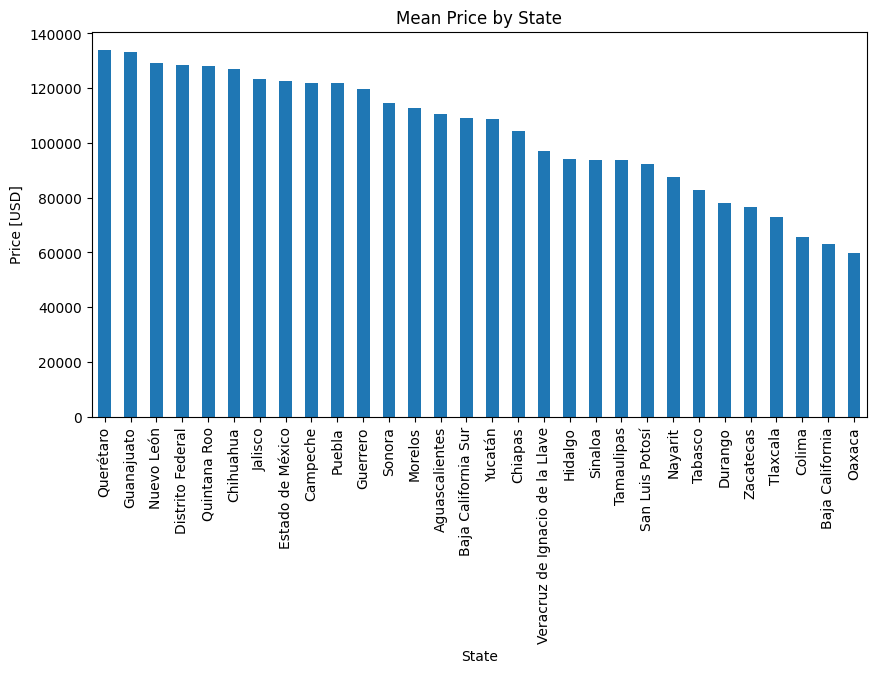

In [16]:
mean_price_by_state.plot(
    kind='bar', 
    title='Mean Price by State', 
    xlabel='State', 
    ylabel='Price [USD]', 
    figsize=(10, 5)
)

creating new column of price per metre2

In [20]:
df['price_per_m2'] = df['price_usd'] / df['area_m2'].astype(int)
df.head()

,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
0,house,Estado de México,19.560181,-99.233528,150,67965.56,453.103733
1,house,Nuevo León,25.688436,-100.198807,186,63223.78,339.912796
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37,1028.028902
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80,628.725333
4,house,Yucatán,21.052583,-89.538639,205,105191.37,513.128634


prices using the new created column

In [29]:
(
    df
    .groupby('state')
    ['price_per_m2'].mean()
    .sort_values(ascending=False)
    
    )

state
Distrito Federal                   1175.889150
Estado de México                    763.753422
Guerrero                            761.557206
Jalisco                             743.568107
Quintana Roo                        736.455284
Nuevo León                          723.710040
Puebla                              700.701974
Querétaro                           687.227849
Oaxaca                              683.019737
Guanajuato                          672.908100
Baja California Sur                 662.401953
Morelos                             649.383992
Tabasco                             643.503348
Campeche                            601.291762
Nayarit                             599.293627
Baja California                     598.852988
Chihuahua                           591.226747
Chiapas                             560.317146
Sinaloa                             546.536310
Yucatán                             545.889476
Tamaulipas                          541.282076
Veracru

<Axes: title={'center': 'Mean House Price per Metre Square'}, xlabel='State', ylabel='Mean price per square metre [USD]'>

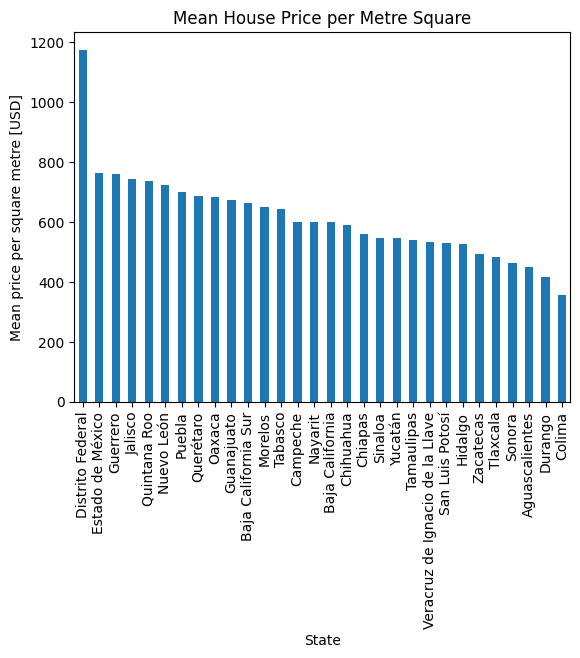

In [34]:
(
    df
    .groupby('state')
    ['price_per_m2'].mean()
    .sort_values(ascending=False)
    .plot(
        kind="bar",
        xlabel="State",
        ylabel="Mean price per square metre [USD]",
        title="Mean House Price per Metre Square"
    )
    )

is there a relatinship between home size and price?

Text(0.5, 0, 'Price vs Area')

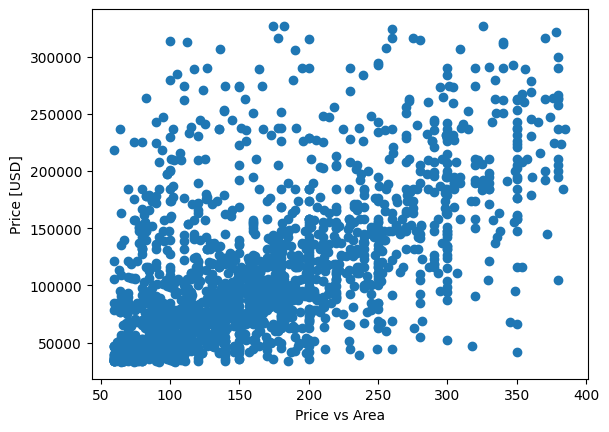

In [37]:
plt.scatter(x=df['area_m2'], y=df['price_usd'])
plt.xlabel("Area [sq metres]")
plt.ylabel("Price [USD]")
plt.xlabel("Price vs Area")

Using the corr method, calculate the Pearson correlation coefficient for "area_m2" and "price_usd".

In [40]:
p_corrlation = df['area_m2'].corr(df['price_usd'])
p_corrlation 

np.float64(0.585518245323206)

In [41]:
#checking correlation of specific areas

In [43]:
df_morelos = df[df['state'] == 'Morelos']
df_morelos

,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
6,house,Morelos,18.812605,-98.954826,281,151509.56,539.179929
9,house,Morelos,18.804197,-98.932816,117,63223.78,540.374188
18,house,Morelos,18.855343,-99.241142,73,36775.16,503.769315
49,house,Morelos,18.804197,-98.932816,130,65858.10,506.600769
55,house,Morelos,18.960244,-99.212962,305,227351.46,745.414623
...,...,...,...,...,...,...,...
1708,house,Morelos,18.835637,-99.252857,200,63223.78,316.118900
1713,apartment,Morelos,18.963312,-99.214456,76,43729.78,575.391842
1725,house,Morelos,23.634501,-102.552788,180,63223.78,351.243222
1729,house,Morelos,18.842861,-99.225906,120,105372.96,878.108000


In [45]:
morelos_correlation = df_morelos['price_usd'].corr(df_morelos['area_m2'])
morelos_correlation

np.float64(0.8498077608713712)

Text(0.5, 1.0, 'Morelos : Price vs Area')

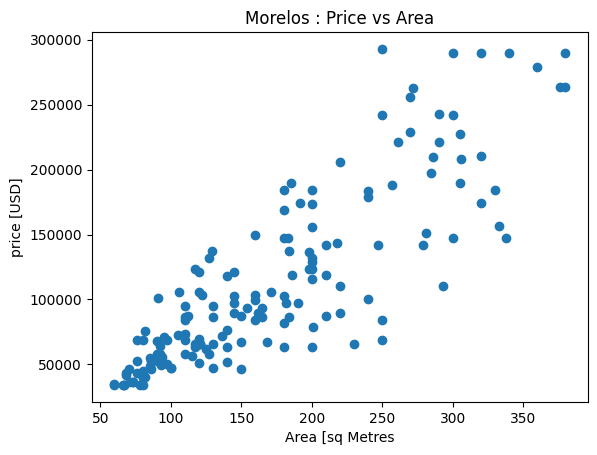

In [51]:
#creating a scatter using morelous

plt.scatter(x=df_morelos['area_m2'], y=df_morelos['price_usd']),
plt.xlabel('Area [sq Metres'),
plt.ylabel('price [USD]'),
plt.title('Morelos : Price vs Area')


Correlation between area and price for Distrito Federal

In [55]:
df_Distrito_Federal = df[df['state']== 'Distrito Federal']
df_Distrito_Federal.shape

(303, 7)

In [57]:
df_Distrito_Federal_correlation = df_Distrito_Federal['area_m2'].corr(df_Distrito_Federal['price_usd'])
df_Distrito_Federal_correlation

np.float64(0.41070392130717864)

Text(0.5, 1.0, 'Distrito_Federal : Price vs Area')

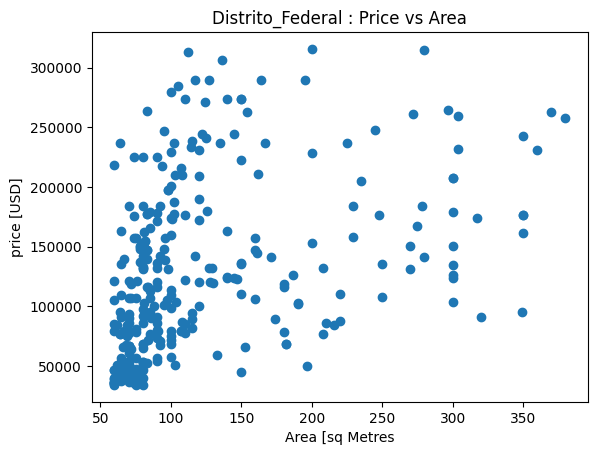

In [58]:
plt.scatter(x = df_Distrito_Federal['area_m2'], y=df_Distrito_Federal['price_usd']),
plt.xlabel('Area [sq Metres'),
plt.ylabel('price [USD]'),
plt.title('Distrito_Federal : Price vs Area')
